# Partie 1: Format Compressed Sparse Row

In [813]:
import numpy as np
import scipy as sp
import scipy.sparse as spsp

np.set_printoptions(precision=4,suppress=True,linewidth=5000)

In [814]:
"""definition de la matrice en csr"""

row = sp.array([0, 0, 1, 2, 2, 2])
col = sp.array([0, 2, 2, 0, 1, 2])
data = sp.array([1., 2, 3, 4, 5, 6])

A = spsp.csr_matrix((data, (row, col)), shape=(3, 3))

In [825]:
print(A)

  (0, 0)	1.0
  (0, 2)	2.0
  (1, 2)	3.0
  (2, 0)	4.0
  (2, 1)	5.0
  (2, 2)	6.0


In [826]:
A

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

## Question 1

In [827]:
"""les données de la matrices"""
A.data 

array([1., 2., 3., 4., 5., 6.])

In [828]:
"""les indices borne des colonne entre lesquelles il y a des valeur non nulles"""
A.indptr

array([0, 2, 3, 6], dtype=int32)

In [829]:
"""les indices des colonnes"""
A.indices

array([0, 2, 2, 0, 1, 2], dtype=int32)

In [830]:
"""la matrice pleine associée"""
A.toarray()

array([[1., 0., 2.],
       [0., 0., 3.],
       [4., 5., 6.]])

In [831]:
"""la fonction print affiche que les valeurs non nul"""
print(A)

  (0, 0)	1.0
  (0, 2)	2.0
  (1, 2)	3.0
  (2, 0)	4.0
  (2, 1)	5.0
  (2, 2)	6.0


## Question 2

In [832]:
"""ceci renvoie un objet de type 'numpy.float64'"""
A[0,:]

<1x3 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [833]:
A[0,:].dtype

dtype('float64')

In [834]:
%%time
"""ceci renvoie les valeurs non nul dans la premiere ligne"""
print(A[0,:])

  (0, 0)	1.0
  (0, 2)	2.0
Wall time: 1e+03 µs


In [835]:
%%time
""" Les valeurs d'une matrice sont stockée d'une manière contigue,
en parcourant les lignes avant les colonnes """

print(A[:,0])

  (0, 0)	1.0
  (2, 0)	4.0
Wall time: 999 µs


## Question 3

In [836]:
"""On peut ajouter deux matrices en formats CSR"""
B = A + A

B.toarray()

array([[ 2.,  0.,  4.],
       [ 0.,  0.,  6.],
       [ 8., 10., 12.]])

## Question 4

In [837]:
"""indique le nombre de colonnes non nulles entre chaque intervalle && indice des donnees sur A.data"""
A.indptr

array([0, 2, 3, 6], dtype=int32)

In [838]:
"""indice de colonnes non nulle"""
A.indices

array([0, 2, 2, 0, 1, 2], dtype=int32)

In [839]:
"""data non nulle"""
A.data

array([1., 2., 3., 4., 5., 6.])

In [843]:
c= A[0,:]*[1,1,1]

In [844]:
def matvect_multiply(A,b):
    
    col = A.indptr
    row = A.indices
    data = A.data

    size = b.size
    y = np.zeros(size)
    
    for i in range(size):
        cols = range(col[i],col[i+1])
        for j in cols:
            y[i] += data[j]*b[row[j]]
    return y

In [845]:
b=np.ones(shape=[3,1])

In [846]:
%%time
"""test"""
matvect_multiply(A,b)

Wall time: 0 ns


In [847]:
%time
A.dot(b)

Wall time: 0 ns


array([[ 3.],
       [ 3.],
       [15.]])

In [848]:
A@b

array([[ 3.],
       [ 3.],
       [15.]])

In [849]:
output = matvect_multiply(A,b).reshape([b.size,1])

In [850]:
"""verification"""
A.dot(b) == A@b

array([[ True],
       [ True],
       [ True]])

In [851]:
A@b == output

array([[ True],
       [ True],
       [ True]])

In [852]:
np.dot(A,b)

array([[<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>],
       [<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>],
       [<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>]], dtype=object)

A.dot(b) est equivalente a A@b mais pas à np.dot(A,b) si A est format CSR.

# Partie 2: Factorisation LU

## Question 5

In [900]:
def Facto_LU(A,CSR=False):
    A=A.toarray()
    n= len(A)
    for k in range(0,n-1):
        for j in range(k+1,n):
            if(A[k,k]==0):
                print("le pivot ("+str(k)+","+str(k)+") est nul, une permutation est nessaire!")
            else:
                A[j,k] = A[j,k]/A[k,k]
                A[j,k+1:n]=A[j,k+1:n] - A[j,k]*A[k,k+1:n]
    if CSR:
        A= spsp.csr.csr_matrix(A) 
    return A

In [901]:
"""test"""
from scipy.linalg import lu_factor
n = 3
A = spsp.diags([-np.ones(n-1),2*np.ones(n),-np.ones(n-1)],[-1,0,1])
out = lu_factor(A.toarray())
print("La difference entre la factorisation LU scipy et celle obetenue par l'algo est: \n \n", out[0]-Facto_LU(A))

La difference entre la factorisation LU scipy et celle obetenue par l'algo est: 
 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [906]:
"""Le type de A est en dia"""
print(type(A)) #il faut faire une conversion en csr

<class 'scipy.sparse.dia.dia_matrix'>


In [907]:
"""On doit le mettre en csr pour que ca soit adapté avec l'algo"""
A=spsp.csr.csr_matrix(A)
print(type(A))

<class 'scipy.sparse.csr.csr_matrix'>


In [908]:
"""appel de fonction"""
print(Facto_LU(A,True))

  (0, 0)	2.0
  (0, 1)	-1.0
  (1, 0)	-0.5
  (1, 1)	1.5
  (1, 2)	-1.0
  (2, 1)	-0.6666666666666666
  (2, 2)	1.3333333333333335


## Question 6

In [910]:
"""Algo de déscente"""
def solve_Ly(A,b): #A est en CSR
    
    col = A.indptr
    row = A.indices
    data = A.data

    # Ly=b
    n=len(b)
    y = np.zeros(n)

    for i in range(0,n): #boucle sur les lignes
        
        cols = range(col[i],col[i+1]) 
        y[i] = b[i]

        for k in cols:#boucles sur les colonnes non nulles
            if (row[k]<i): #diagonale inférieur
                y[i] -= y[row[k]]*data[k] # L a des 1 dans la diagonale!
    return y

In [911]:
"""Algo de remonté"""
def solve_Ux(A,y): #A est en CSR
    
    col = A.indptr
    row = A.indices
    data = A.data

    # Ux=b
    n=len(y)
    x = np.zeros(n)

    for i in range(n-1,-1,-1): #boucle sur les lignes inversées
        
        cols = range(col[i+1]-1,col[i]-1,-1) 
        x[i] = y[i]
        for k in cols:#boucles sur les colonnes non nulles
            if (row[k]>i): #diagonale inférieur
                x[i] -= x[row[k]]*data[k]
                
            if (row[k]==i):
                diag = k
                
        x[i] /= data[diag]#diagonale de U = diag de A
        
    return x

In [912]:
"""Fonction solve_LU()"""
def solve_LU(A,b):
    
    A= Facto_LU(A,CSR=True)
    y= solve_Ly(A,b)
    x= solve_Ux(A,y)
    
    return x

## Question 7

In [915]:
"""test"""
from scipy.linalg import lu_factor
n = 3
A = spsp.diags([-np.ones(n-1),2*np.ones(n),-np.ones(n-1)],[-1,0,1])

print("La matrice LU inplace de A est: \n \n", Facto_LU(A))

La matrice LU inplace de A est: 
 
 [[ 2.     -1.      0.    ]
 [-0.5     1.5    -1.    ]
 [ 0.     -0.6667  1.3333]]


In [916]:
print("La solution calculée par l'algo solve_LU est \n\n",np.array(solve_LU(A,b)).reshape(len(b),1))

La solution calculée par l'algo solve_LU est 

 [[1.5]
 [2. ]
 [1.5]]


In [919]:
"""verification par scipy"""
from scipy.sparse.linalg import spsolve
n = 3
A = spsp.diags([-np.ones(n-1),2*np.ones(n),-np.ones(n-1)],[-1,0,1])
print("La solution calculée par scipy est \n\n",np.array(spsolve(A,b)).reshape(len(b),1))

La solution calculée par scipy est 

 [[1.5]
 [2. ]
 [1.5]]


In [920]:
"""L'erreur"""
print("l'erreur entre les deux methodes est \n\n",spsolve(A,b)-solve_LU(A,b))

l'erreur entre les deux methodes est 

 [0. 0. 0.]


***Conclusion:***

In [921]:
erreur_norme=np.linalg.norm(spsolve(A,b)-solve_LU(A,b))
print("la norme de l'erreur est \n\n",erreur_norme)

la norme de l'erreur est 

 0.0


In [922]:
A_norme = np.linalg.norm(A.toarray())
print("la norme de A est \n\n",A_norme)

la norme de A est 

 4.0


In [923]:
print("la precision est \n\n",np.finfo(np.float64).eps)

la precision est 

 2.220446049250313e-16


Dans les lignes de code ci-dessus on vérifie que l'erreur engendrée par la factorisation en virgule flottante est acceptable en utilisant une precison $\epsilon$. Ceci est vérifié par l'inégalité vue dans le cours:
$$ \big\|\partial A\big\| \leq \big\| L\big\| \big\| U\big\|\times \epsilon $$
Dans le cas étudié, l'erreur est nulle donc il n'y a pas d'erreur due à la précision.

In [928]:
"""verification de la proposition de la factorisation obtenue en virgule flottante """

LU_norme = erreur_norme*A_norme
precision = np.finfo(np.float64).eps
print(erreur_norme <= LU_norme*precision)


True


# Partie 3: Remplissage (Filli in)

## Question 8

***Critère d'existence d'une factorisation LU:***

Si A et B sont à diagonales dominate par ligne ou par colonne, c'est à dire:
$$ \big|A_{ii}\big| \geq \sum_{j = 0}^{n-1} \big|A_{ij}\big| \,\, \forall i \in \big[0,n-1\big] \\ \iff \fbox{ ${\alpha}_A \, et \,{\alpha}_B \geq \sum_0^{n-2}1 = n-1$} $$

Alors les matrice A et B admettent une factorisation LU.


## Question 9

In [929]:
"""structure Dok """
def to_dok(n):
    A = spsp.dok_matrix((n, n), dtype=np.float64)
    B = spsp.dok_matrix((n, n), dtype=np.float64)
    
    A[0,:]= 1
    A[:,0]= 1
    A[0,0]= n-1
    B[n-1,:]= 1
    B[:,n-1]= 1
    B[n-1,n-1]= n-1
    
    for i in range(1,n):
            A[i, i] = 1.0 
            
    for i in range(0,n-1):
            B[i, i] = 1.0 

    return A,B

In [930]:
"""Convertion au format csr"""
def tocsr(A,B):
    
    A= spsp.csr.csr_matrix(A) 
    B= spsp.csr.csr_matrix(B) 
    
    return A,B
    

In [931]:
A,B = to_dok(7)

In [932]:
print("A est: \n\n",A.toarray())
print("\nB est: \n\n",B.toarray())

A est: 

 [[6. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1.]]

B est: 

 [[1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 6.]]


In [933]:
A,B=tocsr(A,B)
A,B

(<7x7 sparse matrix of type '<class 'numpy.float64'>'
 	with 19 stored elements in Compressed Sparse Row format>,
 <7x7 sparse matrix of type '<class 'numpy.float64'>'
 	with 19 stored elements in Compressed Sparse Row format>)

## Question 10

In [934]:
A,B = to_dok(7)
A,B=tocsr(A,B)

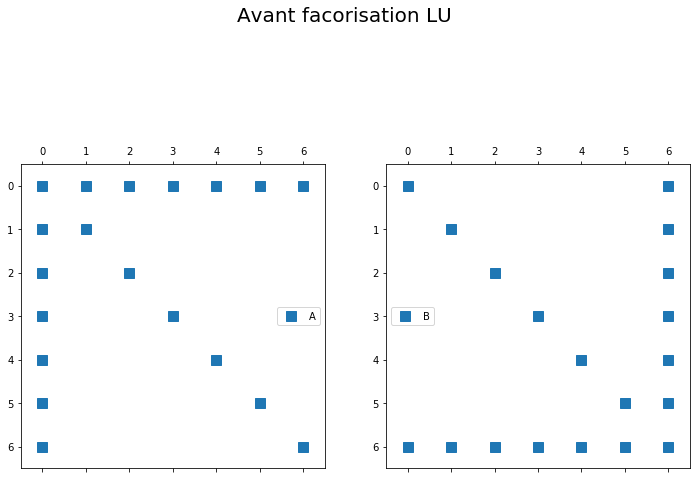

In [935]:
"""Affichage des matrices creuse A, B avant la factorisation LU"""
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(12,9))
ax[0].spy(A,label="A")
ax[1].spy(B,label="B")
ax[0].legend()
ax[1].legend()
fig.suptitle("Avant facorisation LU",fontsize=20)
fig.show()

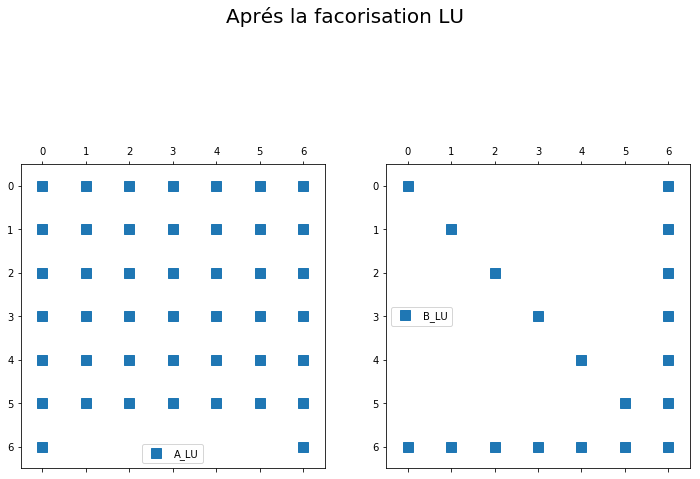

In [600]:
"""Affichage des matrices creuse A, B apres la factorisation LU in place"""
A=Facto_LU(A,True)
B=Facto_LU(B,True)

fig,ax = plt.subplots(1,2,figsize=(12,9))
ax[0].spy(A,label="A_LU")
ax[1].spy(B,label="B_LU")
ax[0].legend()
ax[1].legend()
fig.suptitle("Aprés la facorisation LU",fontsize=20)
fig.show()

***Commentaire***:

La facrorisation LU ne conserve pas le format creux de A!
Il va falloire faire une permuatation entre 0 et n-1 pour que A ressemble à B et aura par suite une conservation du format creux.

# Partie 4: Temps de calcul

## Question 11

In [936]:
def diags_bande(n):
    
    d=int(n**(1/2))
    diags = []
    bande = []
    #termes inferieur
    for i in np.arange(d,0,-1):
        diags.append(-1*np.ones(n-i))
        bande.append(-i)
    #terme diagonale
    diags.append(4*np.ones(n))
    bande.append(0)
    #termes supérieur
    for i in np.arange(1,d+1):
        diags.append(-1*np.ones(n-i))
        bande.append(i)
        
    return diags,bande


In [937]:
"""test"""
diags,bande=diags_bande(10)
print("les diagonales sont: \n \n", diags)
print("\nles emplacements des diagonales sont: \n \n", bande)

les diagonales sont: 
 
 [array([-1., -1., -1., -1., -1., -1., -1.]), array([-1., -1., -1., -1., -1., -1., -1., -1.]), array([-1., -1., -1., -1., -1., -1., -1., -1., -1.]), array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]), array([-1., -1., -1., -1., -1., -1., -1., -1., -1.]), array([-1., -1., -1., -1., -1., -1., -1., -1.]), array([-1., -1., -1., -1., -1., -1., -1.])]

les emplacements des diagonales sont: 
 
 [-3, -2, -1, 0, 1, 2, 3]


In [938]:
A = spsp.diags(diags,bande)
A = spsp.csr.csr_matrix(A)

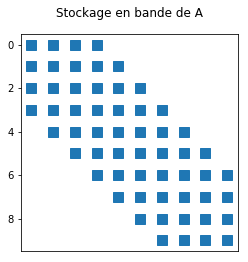

In [939]:
plt.spy(A,label="A")
plt.title("Stockage en bande de A")
plt.xticks([]);

## Question 12

In [940]:
"""Comparaison du temps de calcul de la factorisation LU de A et de sa version dense"""
import time

def time_lu(A):
    deb = time.time()
    Facto_LU(A,True)
    fin = time.time()
    #print("(LU) temps de calcul = ", fin-deb)
    return fin-deb
    

In [941]:
def mat_dense(n):
    A =np.ones((n,n))
    for i in range(n):
        A[i,i]=n #   """diagonale dominante"""
    A = spsp.csr.csr_matrix(A)
    return A

def Comparaison(dim):
    
    bande_time=[]
    dense_time=[]
    
    for n in dim:
        
        diags,bande=Band_intervalle(n,d)
        A = spsp.diags(diags,bande)
        A = spsp.csr.csr_matrix(A)
        bande_time.append(time_lu(A))
        A = mat_dense(n)# matrice dense
        dense_time.append(time_lu(A))
    
    return bande_time,dense_time

In [942]:
"""test"""
n = np.arange(4,100,5)
bande_time,dense_time=Comparaison(n)

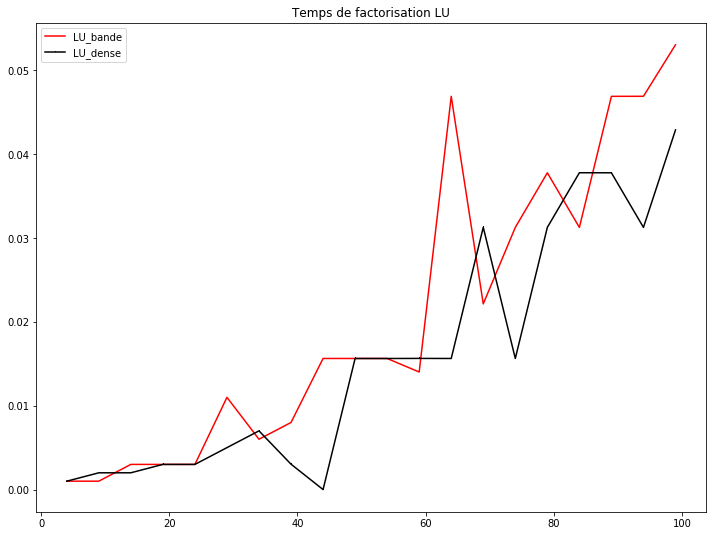

In [943]:
"""plot"""
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(n,bande_time,'r-',label="LU_bande")
ax.plot(n,dense_time,'k-,',label="LU_dense")
ax.legend(loc='best')
ax.set_title("Temps de factorisation LU")
fig.show()

#### ***Commentaire***:
La matrice bande n'est assez rapide comme on pouvait espérer d'une matrice creuse! Ceci est du au fait que la forme creuse n'est pas conservée par la factorisation  LU. Cela explique aussi les pics ou la factorisation de la matrice bande est plus rapide.

## Question 13

In [945]:
"""En utilisant la classe :scipy.sparse.linalg.splu"""
def time_lu(A):
    deb = time.time()
    A = spsp.csr.csr_matrix(A)
    spsp.linalg.splu(A)
    fin = time.time()
    #print("(LU) temps de calcul = ", fin-deb)
    return fin-deb

def Comparaison_scipy(dim):
    
    bande_time=[]
    dense_time=[]
    
    for n in dim:
        
        diags,bande=Band_intervalle(n,d)
        A = spsp.diags(diags,bande)
        A = spsp.csr.csr_matrix(A)
        bande_time.append(time_lu(A))
        A = mat_dense(n)# matrice dense
        dense_time.append(time_lu(A))
    
    return bande_time,dense_time

In [946]:
"""appel de la fonction"""
n = np.arange(4,100,10)
bande_time,dense_time=Comparaison(n)

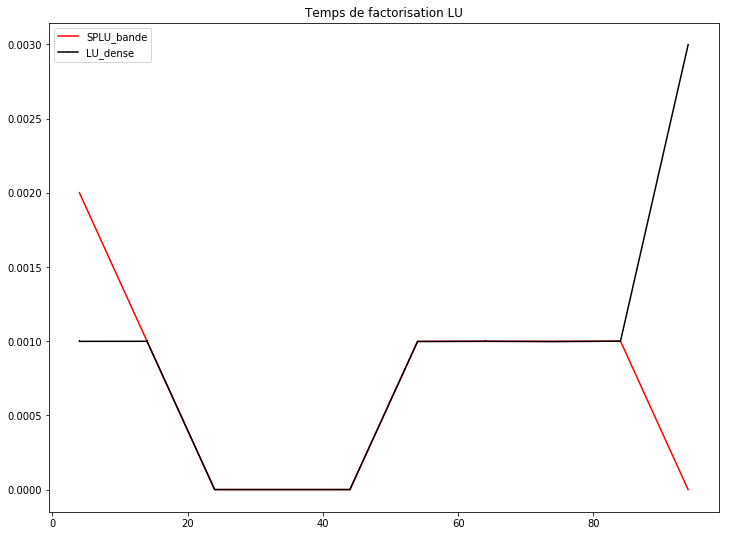

In [947]:
"""plot"""
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(n,bande_time,'r-',label="SPLU_bande")
ax.plot(n,dense_time,'k-,',label="LU_dense")
ax.legend(loc='best')
ax.set_title("Temps de factorisation LU")
fig.show()

***Commentaire:***
*  Il est claire dans le graphe ci dessus que quand on untilise des permuations inclut par la classe "SPLU" dans la factorisation on a une conservation de format creuse ce qui signifie un temps de calcul rapide par suite.
* Aussi plus n est grand plus la forme creuse de la matrice est cruciale pour diminuer le temps de calcul. Dans l'exemple c'est à partir de n $\sim 80$.